In [10]:
import pandas as pd

data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Experiment 1

In [11]:
from pycaret.regression import *

In [12]:
s = setup(data, target = 'charges', session_id = 123)

,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 14)"


In [13]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4165.9653,33302018.0000,5770.7900,0.8011,0.4683,0.4153
1,4503.7363,43746480.0000,6614.1123,0.7456,0.5633,0.4217
2,3880.5525,31795138.0000,5638.7178,0.5974,0.7645,0.4396
3,3747.6453,26805302.0000,5177.3838,0.7762,0.5015,0.5175
4,4471.0420,43410544.0000,6588.6680,0.6771,0.5224,0.3767
5,4182.7554,36166332.0000,6013.8452,0.7674,0.7416,0.4320
6,4081.1006,39192588.0000,6260.3984,0.7333,0.6434,0.4241
7,4928.1533,46415028.0000,6812.8574,0.7448,0.5887,0.4137
8,4609.3149,40370356.0000,6353.7671,0.7392,0.5686,0.5111


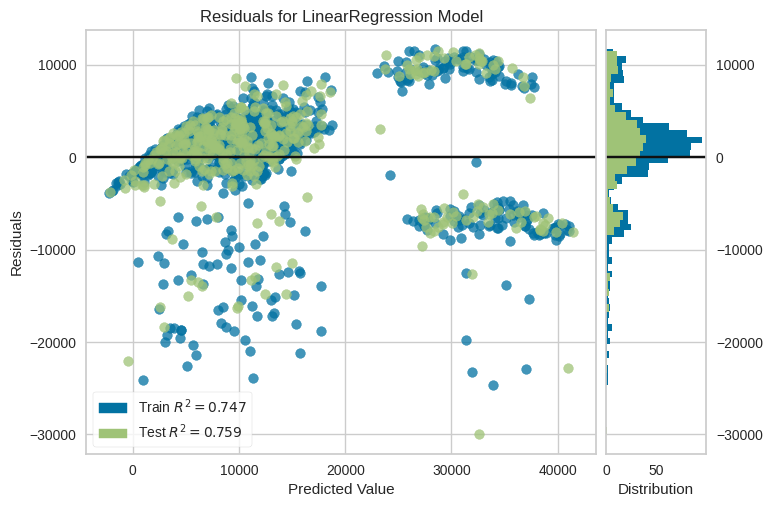

In [14]:
plot_model(lr)

# Experiment 2

In [15]:
s2 = setup(data, target = 'charges', session_id = 123,
           normalize = True,
           polynomial_features = True, trigonometry_features = True, feature_interaction=True, 
           bin_numeric_features= ['age', 'bmi'])

,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 56)"


In [19]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2974.9690,20903856.0000,4572.0737,0.8751,0.3909,0.3158
1,3487.7488,32522758.0000,5702.8726,0.8109,0.4418,0.3378
2,3015.1313,23367128.0000,4833.9556,0.7041,0.5432,0.4089
3,2934.5681,19558630.0000,4422.5142,0.8367,0.4732,0.3946
4,3235.1030,27340320.0000,5228.7974,0.7967,0.4556,0.3098
5,3415.4824,26663998.0000,5163.7192,0.8285,0.4716,0.3093
6,2949.6807,25429404.0000,5042.7578,0.8270,0.3803,0.3159
7,3499.5083,30093736.0000,5485.7759,0.8345,0.4745,0.3157
8,3124.8257,22806156.0000,4775.5791,0.8527,0.4059,0.3348


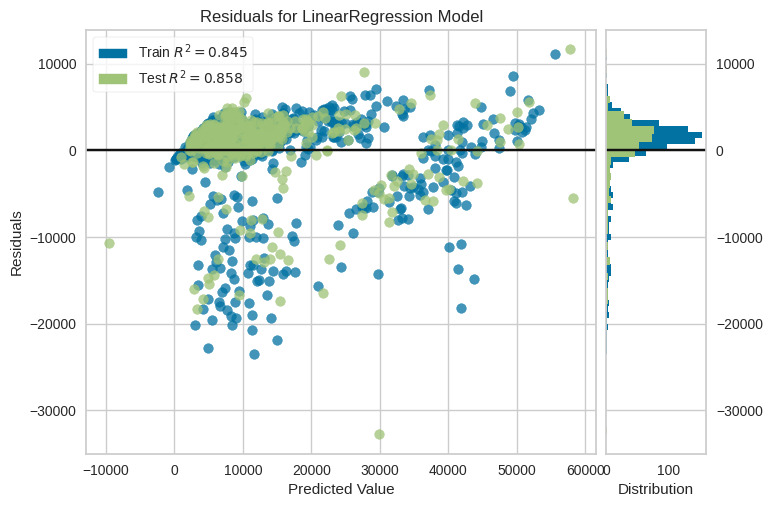

In [20]:
plot_model(lr)

In [21]:
save_model(lr, 'deployment_28042020')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs',
                  DFS_Classic(interactions=['multiply'], ml_usecase='regression',
                              n_jobs=-1, random_state=123, subclass='binary',
                              target='charges'

In [22]:
deployment_28042020 = load_model('deployment_28042020')

Transformation Pipeline and Model Successfully Loaded


In [23]:
deployment_28042020

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy...
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                ('dfs',
                 DFS_Classic(interactions=['multiply'], ml_usecase='regression',
                             n_jobs=-1, random_state=123, subclass='binary',
                             target='charges',
               

In [24]:
import requests
url = 'https://pycaret-insurance.herokuapp.com/predict_api'
pred = requests.post(url,json={'age':55, 'sex':'male', 'bmi':59, 'children':1, 'smoker':'male', 'region':'northwest'})
print(pred.json())

75716.0
